In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
#Questão 1

In [ ]:
#Carrega o dataset com os dados para o treinamento e validacao
dados = pd.read_csv("/content/iris.csv")

In [ ]:
dados.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = dados.drop(columns=['species'])
y = dados['species']

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
y_pred = log_reg_model.predict(X_test)

In [ ]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 1.0


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

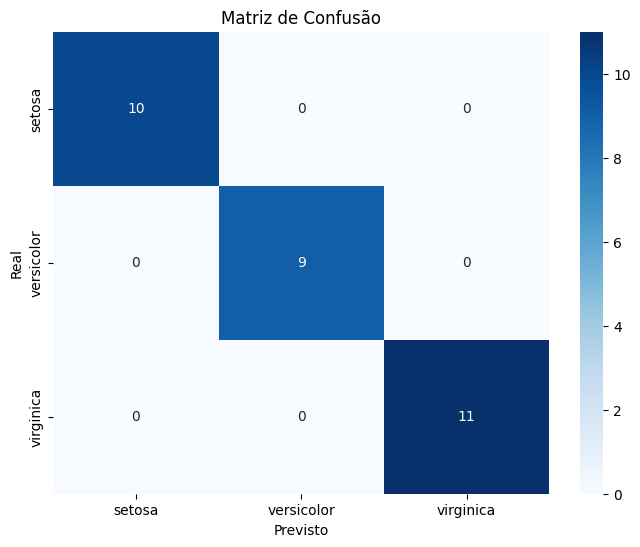

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [ ]:
#Questão 7

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
dados = pd.read_csv("/content/iris.csv")

In [4]:
print(dados.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
X = dados.drop(columns=['species'])  # Features
y = dados['species']  # Target (class)

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [8]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred = naive_bayes_model.predict(X_test)

In [10]:
weighted_precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão Média Ponderada: {weighted_precision}')

Precisão Média Ponderada: 1.0


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 1.0


In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)

Matriz de Confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


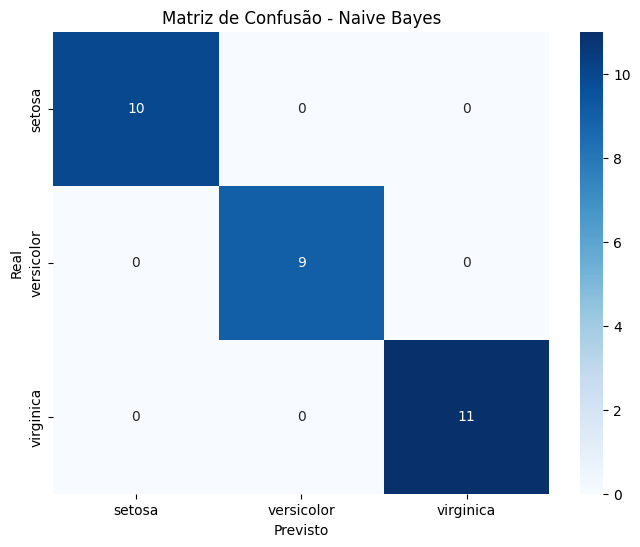

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão - Naive Bayes")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [ ]:
#Questão 14

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [16]:
dados = pd.read_csv("/content/iris.csv")

In [17]:
print(dados.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [18]:
X = dados.drop(columns=['species'])

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
k = 3

In [21]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [22]:
labels = kmeans.labels_

In [23]:
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Coeficiente de Silhueta: {silhouette_avg}")

Coeficiente de Silhueta: 0.4787241921049546


In [24]:
inertia = kmeans.inertia_
print(f"Inércia dos Clusters: {inertia}")

Inércia dos Clusters: 192.03717409190025


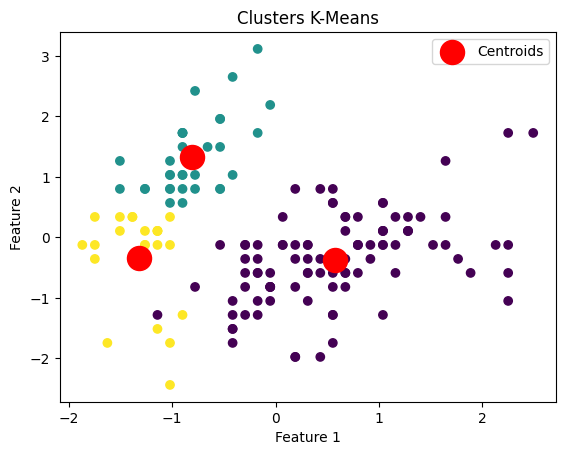

In [25]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title("Clusters K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()